<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import pickle

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для воспроизводимости результатов`



# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [249]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [14]:
#  Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
df_train.sample(n=10)

name  year  selling_price  \
1431                           Maruti Swift Dzire VDI  2013         480000   
64                  Maruti Vitara Brezza ZDi Plus AMT  2019        1025000   
5256                      Hyundai Creta 1.4 CRDi Base  2017         957000   
3666                              Ford Ikon 1.3 Flair  2005         120000   
865   Toyota Innova 2.5 EV (Diesel) PS 8 Seater BS IV  2013         850000   
966                                     Honda Jazz VX  2016         550000   
273                              Honda City i-DTEC VX  2017        1250000   
4850                              Maruti Alto 800 LXI  2017         310000   
3026                         Honda Amaze S AT i-Vtech  2015         450000   
3361                             Honda Amaze E i-DTEC  2017         515000   

      km_driven    fuel       seller_type transmission         owner  \
1431      80000  Diesel        Individual       Manual   First Owner   
64         9850  Diesel        Individual    Automatic   First Owner   
5256      60000  Diesel        Individual       Manual   First Owner   
3666      90000  Petrol        Individual       Manual  Second Owner   
865      120000  Diesel        Individual       Manual  Second Owner   
966       56494  Petrol  Trustmark Dealer       Manual   First Owner   
273       33000  Diesel        Individual       Manual   First Owner   
4850      35000  Petrol        Individual       Manual   First Owner   
3026      45000  Petrol        Individual    Automatic   First Owner   
3361      60000  Diesel        Individual       Manual  Second Owner   

         mileage   engine   max_power                 torque  seats  
1431   23.4 kmpl  1248 CC      74 bhp         190Nm@ 2000rpm    5.0  
64     24.3 kmpl  1248 CC    88.5 bhp         200Nm@ 1750rpm    5.0  
5256  21.38 kmpl  1396 CC    88.7 bhp  219.7Nm@ 1500-2750rpm    5.0  
3666   13.8 kmpl  1299 CC      70 bhp  10.7@ 2,500(kgm@ rpm)    5.0  
865   12.99 kmpl  2494 CC  100.57 bhp    200Nm@ 1400-3400rpm    8.0  
966    18.2 kmpl  1199 CC    88.7 bhp         110Nm@ 4800rpm    5.0  
273    25.6 kmpl  1498 CC    97.9 bhp         200Nm@ 1750rpm    5.0  
4850   24.7 kmpl   796 CC    47.3 bhp          69Nm@ 3500rpm    5.0  
3026   15.5 kmpl  1198 CC    86.7 bhp         109Nm@ 4500rpm    5.0  
3361   25.8 kmpl  1498 CC    98.6 bhp         200Nm@ 1750rpm    5.0

In [15]:
# Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [16]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [250]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
# Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
#  для трейна

print('Пустых значений в столбце:')

for i in df_train.columns:
    print(i, df_train[i].isnull().sum())

Пустых значений в столбце:
name 0
year 0
selling_price 0
km_driven 0
fuel 0
seller_type 0
transmission 0
owner 0
mileage 202
engine 202
max_power 196
torque 203
seats 202


In [251]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [20]:
# Для теста
for i in df_test.columns:
    print(i, df_train[i].isnull().sum())

name 0
year 0
selling_price 0
km_driven 0
fuel 0
seller_type 0
transmission 0
owner 0
mileage 202
engine 202
max_power 196
torque 203
seats 202


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [22]:
#  Посмотрите, есть ли в данных явные дубликаты (0.05 балла)

df_train[df_train.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
326   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
...       ...         ...                  ...    ...  
6880  1461 CC  108.45 bhp       240Nm@ 1750rpm    5.0  
6881  1248 CC   88.50 bhp       200Nm@ 1750rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[985 rows x 13 columns]

In [26]:
print('Кол-во дубликатов в трейне:', len(df_train[df_train.duplicated()]))

Кол-во дубликатов в трейне: 985


In [24]:
df_test[df_test.duplicated()]


name  year  selling_price  km_driven  \
200           Maruti Swift AMT VVT VXI  2019         650000       5621   
235  Hyundai Grand i10 1.2 CRDi Sportz  2017         450000      56290   
238            Toyota Camry 2.5 Hybrid  2016        2000000      68089   
253              Tata Safari Storme EX  2015         503000     110000   
269     Jaguar XF 2.0 Diesel Portfolio  2017        3200000      45000   
..                                 ...   ...            ...        ...   
934    Mercedes-Benz S-Class S 350 CDI  2017        6000000      37000   
936         BMW X4 M Sport X xDrive20d  2019        5500000       8500   
949            Toyota Camry 2.5 Hybrid  2016        2000000      68089   
971        Maruti Ertiga SHVS ZDI Plus  2017         750000      50000   
984                    Maruti Ritz VDi  2012         300000      70000   

       fuel       seller_type transmission        owner     mileage   engine  \
200  Petrol  Trustmark Dealer    Automatic  First Owner   22.0 kmpl  1197 CC   
235  Diesel            Dealer       Manual  First Owner   24.0 kmpl  1186 CC   
238  Petrol  Trustmark Dealer    Automatic  First Owner  19.16 kmpl  2494 CC   
253  Diesel        Individual       Manual  First Owner   14.1 kmpl  2179 CC   
269  Diesel            Dealer    Automatic  First Owner  19.33 kmpl  1999 CC   
..      ...               ...          ...          ...         ...      ...   
934  Diesel            Dealer    Automatic  First Owner   13.5 kmpl  2987 CC   
936  Diesel            Dealer    Automatic  First Owner  16.78 kmpl  1995 CC   
949  Petrol  Trustmark Dealer    Automatic  First Owner  19.16 kmpl  2494 CC   
971  Diesel        Individual       Manual  First Owner  24.52 kmpl  1248 CC   
984  Diesel        Individual       Manual  First Owner   23.2 kmpl  1248 CC   

      max_power                  torque  seats  
200   81.80 bhp          113Nm@ 4200rpm    5.0  
235   73.97 bhp  190.24nm@ 1750-2250rpm    5.0  
238   157.7 bhp          213Nm@ 4500rpm    5.0  
253  147.94 bhp     320Nm@ 1500-3000rpm    7.0  
269     177 bhp     430Nm@ 1750-2500rpm    5.0  
..          ...                     ...    ...  
934  254.79 bhp     620Nm@ 1600-2400rpm    5.0  
936     190 bhp     400Nm@ 1750-2500rpm    5.0  
949   157.7 bhp          213Nm@ 4500rpm    5.0  
971    88.5 bhp          200Nm@ 1750rpm    7.0  
984   73.94 bhp          190Nm@ 2000rpm    5.0  

[62 rows x 13 columns]

In [27]:
print('Кол-во дубликатов в тест:', len(df_test[df_test.duplicated()]))

Кол-во дубликатов в тест: 62


In [ ]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

In [34]:
# объединение трейна и теста, чтобы составить общий EDA
df = pd.concat([df_train, df_test], axis = 0)

In [35]:
profile_report = ProfileReport(df, title='Pandas Report CARs Dataset')
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [155]:
profile_report.to_file('cars_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы по дашборду:
* всего 13 колонок, из них 5 тестовых, 4 категориальные, 4 с цифрами
* есть дубликаты, дашборд показывает 607 (7.6%)
* есть пропуски
* в колонке seller_type сильный дисбаланс в данных
* есть небольшая зависимость целевой переменной (цена) с годом, и с пробегом

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

`Пропуски найдены в столбцах: mileage, engine, max_power, torque, seats
так как данные в этих столбцах еще не предобработаны, и не переведены в числа, а являются строками (за исключением seats), то хочется заполнить пропуски после предобработки данных в столбцах, поэтому это задание выполню ниже, после предобработки столбцов с пропусками.`

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [252]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [253]:
# список колонок без целевой переменной price
lst_subset = ['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']

In [254]:
# список дубликатов с исключенной целевой переменной в трейне
df_train[df_train.duplicated(subset = lst_subset)]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [255]:
print('Количество дубликатов:', len(df_train[df_train.duplicated(subset = lst_subset)]))

Количество дубликатов: 1159


In [256]:
# удаление полных дубликатов
df_train.drop_duplicates(inplace = True)

In [257]:
# остались дубликаты с разной ценой
df_train[df_train.duplicated(subset = lst_subset)]

name  year  selling_price  \
268                     Maruti Swift Dzire VXI  2014         400000   
370                 BMW X4 M Sport X xDrive20d  2019        5400000   
444                        Maruti Alto 800 VXI  2016         270000   
766                   Chevrolet Beat Diesel LT  2012         200000   
1000                           Maruti Alto LXI  2005          80000   
...                                        ...   ...            ...   
6815                    Datsun RediGO T Option  2016         200000   
6891                       Maruti Alto 800 LXI  2017         270000   
6906                          Maruti Swift VDI  2012         416000   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   

      km_driven    fuel seller_type transmission         owner     mileage  \
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
370        7500  Diesel      Dealer    Automatic   First Owner  16.78 kmpl   
444       50000  Petrol  Individual       Manual   First Owner  22.74 kmpl   
766       70000  Diesel  Individual       Manual  Second Owner  25.44 kmpl   
1000      40000  Petrol  Individual       Manual  Second Owner   19.7 kmpl   
...         ...     ...         ...          ...           ...         ...   
6815      35000  Petrol  Individual       Manual   First Owner   22.7 kmpl   
6891      35000  Petrol  Individual       Manual   First Owner   24.7 kmpl   
6906      90000  Diesel  Individual       Manual  Second Owner   22.9 kmpl   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   

       engine  max_power               torque  seats  
268   1197 CC   85.8 bhp       114Nm@ 4000rpm    5.0  
370   1995 CC    190 bhp  400Nm@ 1750-2500rpm    5.0  
444    796 CC   47.3 bhp        69Nm@ 3500rpm    5.0  
766    936 CC   57.6 bhp       150Nm@ 1750rpm    5.0  
1000   796 CC   46.3 bhp        62Nm@ 3000rpm    5.0  
...       ...        ...                  ...    ...  
6815   799 CC  53.64 bhp        72Nm@ 4386rpm    5.0  
6891   796 CC   47.3 bhp        69Nm@ 3500rpm    5.0  
6906  1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6947   995 CC     62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  

[174 rows x 13 columns]

In [258]:
# удаляем дубликаты с разной ценой, с параметром keep = first для того, чтобы оставить первую строку по этому автомобилю
df_train.drop_duplicates(subset = lst_subset, keep = 'first', inplace = True)
df_train.reset_index(drop=True, inplace=True) # обновление индексов
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [259]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Работа с 'mileage'

In [260]:
# колонка mileage содержит две единицы измерения kmpl (количество километров на одном литре топлива) и km/kg (километр на килограмм), нужно привести к одной единице измерения
# в таблице большинство данных в kmpl поэтому приведем все к этой единице
# соотношение одного литра бензина примерно равно 750 грамм
# функция преобразования колонки mileage
def edit_mileage(row):
    if str(row['mileage']).endswith('km/kg'): # находим единицу измерения с помощью endswith (показывает  окончание с указанным суффиксом)
        row['mileage'] = row['mileage'][:-5] # убираем единицу измерения
        row['mileage'] = round(float(row['mileage'])*1.4, 2) # переводим килограммы в литры
    elif str(row['mileage']).endswith('kmpl'): # если единица измерения литры
        row['mileage'] = round(float(row['mileage'][:-5]), 2) # убираем единицу измерения
    return row

In [261]:
df_train = df_train.apply(edit_mileage, axis = 1)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage   engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248 CC   
1     Diesel  Individual       Manual          Second Owner    21.14  1498 CC   
2     Diesel  Individual       Manual           First Owner    23.00  1396 CC   
3     Petrol  Individual       Manual           First Owner    16.10  1298 CC   
4     Petrol  Individual       Manual           First Owner    20.14  1197 CC   
...      ...         ...          ...                   ...      ...      ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086 CC   
5836  Petrol  Individual       Manual          Second Owner    18.90   998 CC   
5837  Petrol  Individual       Manual           First Owner    18.50  1197 CC   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493 CC   
5839  Diesel  Individual       Manual           First Owner    19.30  1248 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4      81.86 bhp          113.75nm@ 4000rpm    5.0  
...          ...                        ...    ...  
5835    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836    67.1 bhp              90Nm@ 3500rpm    5.0  
5837   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [262]:
df_test = df_test.apply(edit_mileage, axis = 1)
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage   engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498 CC   
1    Diesel  Individual       Manual   First Owner    21.50  1497 CC   
2    Petrol  Individual    Automatic   First Owner    12.90  1799 CC   
3    Diesel  Individual       Manual   First Owner    25.10  1498 CC   
4    Petrol  Individual       Manual  Second Owner    16.50  1172 CC   
..      ...         ...          ...           ...      ...      ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086 CC   
996  Petrol  Individual       Manual  Second Owner    18.60  1197 CC   
997  Diesel  Individual       Manual   First Owner    23.00  1396 CC   
998  Petrol  Individual       Manual   First Owner    20.36  1197 CC   
999  Diesel  Individual       Manual   First Owner    26.00  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

Работа с 'engine'

In [263]:
# оставляем только цифры, переводим в float
df_train['engine'] = df_train['engine'].apply(lambda x: float(re.sub(r'[^0-9]','', x)) if type(x) == str else x)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4      81.86 bhp          113.75nm@ 4000rpm    5.0  
...          ...                        ...    ...  
5835    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836    67.1 bhp              90Nm@ 3500rpm    5.0  
5837   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [264]:
df_test['engine'] = df_test['engine'].apply(lambda x: float(re.sub(r'[^0-9]','', x)) if type(x) == str else x)
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

Работа с 'max_power'

In [265]:
# выявлено наличие значения без цифр, только единица измерения, заполним такое значение np.nan
df_train.loc[df_train['max_power'] == '']

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats]
Index: []

In [266]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: re.sub(r'[^0-9.]','', x).strip() if type(x) == str else x)
df_train['max_power'] = df_train['max_power'].apply(lambda x: np.nan if x == '' else float(x))

df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm    5.0  
1        103.52        250Nm@ 1500-2500rpm    5.0  
2         90.00   22.4 kgm at 1750-2750rpm    5.0  
3         88.20      11.5@ 4,500(kgm@ rpm)    5.0  
4         81.86          113.75nm@ 4000rpm    5.0  
...         ...                        ...    ...  
5835      62.10            96.1Nm@ 3000rpm    5.0  
5836      67.10              90Nm@ 3500rpm    5.0  
5837      82.85           113.7Nm@ 4000rpm    5.0  
5838     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839      73.90             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [267]:
df_train.loc[df_train['max_power'] < 10]
# обнаружились строки, где max_power равно нулю, так как? такого быть не может отнесем это к пропускам и заполним значением np.nan

name  year  selling_price  km_driven    fuel  \
476               Maruti Alto K10 LXI  2011         204999      97500  Petrol   
1112  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
2003   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   

     seller_type transmission        owner  mileage  engine  max_power torque  \
476   Individual       Manual  First Owner      NaN     NaN        0.0    NaN   
1112      Dealer       Manual  First Owner      NaN     NaN        0.0    NaN   
2003  Individual       Manual  First Owner      NaN     NaN        0.0    NaN   

      seats  
476     NaN  
1112    NaN  
2003    NaN

In [268]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: np.nan if x == 0.0 else x)

In [269]:
# аналогичная работа с тестом
df_test['max_power'] = df_test['max_power'].apply(lambda x: re.sub(r'[^0-9.]','', x).strip() if type(x) == str else x)
df_test['max_power'] = df_test['max_power'].apply(lambda x: np.nan if x == '' else float(x))

df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power                    torque  seats  
0       112.00   260 Nm at 1800-2200 rpm    7.0  
1       108.50       260Nm@ 1500-2750rpm    5.0  
2       130.00            172Nm@ 4300rpm    5.0  
3        98.60            200Nm@ 1750rpm    5.0  
4        65.00      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995      68.05          99.04Nm@ 4500rpm    5.0  
996      81.83          114.7Nm@ 4000rpm    5.0  
997      90.00  22.4 kgm at 1750-2750rpm    5.0  
998      78.90          111.8Nm@ 4000rpm    5.0  
999      98.60            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

>Стобец torque мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.


Рассмотрим идеальный случай и предобработаем колонку torque

Работа с 'torque'

делим torque — на два столбца: torque и max_torque_rpm

In [270]:
# видно, что используются различные единицы измерения
# kgm - килограмм на метр
# nm - ньютон на метр
# rpm - количество оборотов, которое механизм или двигатель вращается за единицу времени
# 1 kg-m to N-m = 9.80665 N-m
# большинство значений в nm & поэтому будем переводить в эту единицу измерения

In [271]:
#  фунцкия предобработки 'torque'
def edit_torque(row):

    if type(row['torque']) != float:

        text = row['torque'].replace('at', '').replace('@', '').lower()
        unit = text
        unit = re.sub(r'[^a-z]',' ', unit).replace('rpm', '').strip()
        col1 = re.sub(r'[^0-9.,]',' ', text).split(' ')[0]
        if unit == 'kgm':
            row['torque'] = round(float(col1)*9.80665, 2)
        else:
            row['torque'] = float(col1)

        col2 = ''.join(re.sub(r'[^0-9.,-]',' ', text).split(' ')[1:]).replace(',', '').split('-')[-1]
        if col2 == '':
            col2 = np.nan

        row['max_torque_rpm'] = float(col2)

    else:
        row['torque'] = row['torque']
        row['max_torque_rpm'] = row['torque']

    return row

In [272]:
df_train = df_train.apply(edit_torque, axis=1)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  torque  seats  max_torque_rpm  
0         74.00  190.00    5.0          2000.0  
1        103.52  250.00    5.0          2500.0  
2         90.00  219.67    5.0          2750.0  
3         88.20  112.78    5.0          4500.0  
4         81.86  113.75    5.0          4000.0  
...         ...     ...    ...             ...  
5835      62.10   96.10    5.0          3000.0  
5836      67.10   90.00    5.0          3500.0  
5837      82.85  113.70    5.0          4000.0  
5838     110.00  235.36    5.0          2750.0  
5839      73.90  190.00    5.0          2000.0  

[5840 rows x 14 columns]

In [273]:
# есть аномальное значение max_torque_rpm, оригинале 190@ 21,800(kgm@ rpm), после обработки 21800, вероятно ошибка, в дальнейшем возможно придется исправить это значение
df_train.loc[df_train['max_torque_rpm'] > 6000]

name  year  selling_price  km_driven    fuel  \
98    Volkswagen Passat 1.8 TSI MT  2010         700000     114000  Petrol   
3936               Tata Sumo EX TC  2005         225000     188000  Diesel   
4218  Volkswagen Passat 1.8 TSI MT  2010         300000     120000  Petrol   

     seller_type transmission         owner  mileage  engine  max_power  \
98    Individual       Manual   First Owner     14.3  1798.0      160.0   
3936  Individual       Manual   First Owner     12.3  1948.0       90.0   
4218  Individual       Manual  Second Owner     14.3  1798.0      160.0   

       torque  seats  max_torque_rpm  
98     250.00    5.0      15004500.0  
3936  1863.26    7.0         21800.0  
4218   250.00    5.0      15004500.0

In [274]:
# обнаружено ошибочное значение после предобработки, поэтому заменяем его вручную
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: 4500 if x == 15004500 else x)
df_train['max_torque_rpm'].max()

21800.0

Значение 21800.0 тоже выглядит ошибочным, но пока оставляем его, так как нет точных данных о том, что это точно ошибка

In [275]:
# предобработка теста
df_test = df_test.apply(edit_torque, axis=1)
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power  torque  seats  max_torque_rpm  
0       112.00  260.00    7.0          2200.0  
1       108.50  260.00    5.0          2750.0  
2       130.00  172.00    5.0          4300.0  
3        98.60  200.00    5.0          1750.0  
4        65.00   96.00    5.0          3000.0  
..         ...     ...    ...             ...  
995      68.05   99.04    5.0          4500.0  
996      81.83  114.70    5.0          4000.0  
997      90.00  219.67    5.0          2750.0  
998      78.90  111.80    5.0          4000.0  
999      98.60  200.00    5.0          1750.0  

[1000 rows x 14 columns]

In [276]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5653 non-null   float64
 11  torque          5653 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5650 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


Так как во всех колонках с пропусками теперь числовые данные, заполним пропуски, так будет корректнее

In [277]:
# заполнение мидианой трейн в трейне
for i in df_train.select_dtypes(include='number'):
    df_train[i] = df_train[i].fillna(df_train[i].median())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [278]:
# заполнение медианой трейн в тесте
for i in df_test.select_dtypes(include='number'):
    df_test[i] = df_test[i].fillna(df_train[i].median())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   float64
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [279]:
# your code here
df_train['engine'] = df_train['engine'].astype('int64')
df_train['seats'] = df_train['seats'].astype('int64')

df_test['engine'] = df_test['engine'].astype('int64')
df_test['seats'] = df_test['seats'].astype('int64')

In [280]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [281]:
df_train.describe(include = [np.number]).T

count           mean            std        min       25%  \
year            5840.0    2013.428425       4.095622   1983.000    2011.0   
selling_price   5840.0  522960.091096  535432.001912  29999.000  250000.0   
km_driven       5840.0   73952.242466   60071.136504      1.000   39000.0   
mileage         5840.0      19.547144       4.228315      0.000      17.0   
engine          5840.0    1429.448973     485.662834    624.000    1197.0   
max_power       5840.0      87.948422      31.577884     32.800      68.0   
torque          5840.0     175.357517     107.145014     47.070     111.8   
seats           5840.0       5.426712       0.982344      2.000       5.0   
max_torque_rpm  5840.0    3039.545672     917.140693     38.725    2250.0   

                      50%        75%          max  
year              2014.00    2017.00      2020.00  
selling_price   405000.00  640000.00  10000000.00  
km_driven        70000.00  100000.00   2360457.00  
mileage             19.40      22.32        46.82  
engine            1248.00    1498.00      3604.00  
max_power           81.86      99.00       400.00  
torque             160.00     200.06      1863.26  
seats                5.00       5.00        14.00  
max_torque_rpm    3000.00    4000.00     21800.00

In [282]:
df_train.describe(include = [object]).T

count unique                     top  freq
name          5840   1924  Maruti Swift Dzire VDI    91
fuel          5840      4                  Diesel  3177
seller_type   5840      3              Individual  5223
transmission  5840      2                  Manual  5336
owner         5840      5             First Owner  3603

In [283]:
df_test.describe(include = [np.number]).T

count           mean            std        min          25%  \
year            1000.0    2013.681000       4.012149   1995.000    2011.0000   
selling_price   1000.0  617901.042000  758553.860710  31000.000  250000.0000   
km_driven       1000.0   71393.341000   48486.218662   1303.000   37000.0000   
mileage         1000.0      19.414180       4.090350      0.000      16.5875   
engine          1000.0    1454.876000     521.995740    624.000    1197.0000   
max_power       1000.0      90.841670      34.893389     34.200      69.0000   
torque          1000.0     177.617440     103.734417     48.000     111.7000   
seats           1000.0       5.403000       0.912921      4.000       5.0000   
max_torque_rpm  1000.0    3083.987248     891.324349     11.248    2500.0000   

                       50%        75%         max  
year              2014.000    2017.00     2020.00  
selling_price   434999.000  670000.00  6000000.00  
km_driven        61500.000  100000.00   375000.00  
mileage             19.400      22.32       45.16  
engine            1248.000    1582.00     3604.00  
max_power           82.425     102.00      280.00  
torque             160.000     205.00     1421.96  
seats                5.000       5.00        9.00  
max_torque_rpm    3000.000    4000.00     5200.00

In [284]:
df_test.describe(include = [object]).T

count unique                  top freq
name          1000    621  Maruti Alto 800 LXI   15
fuel          1000      4               Diesel  534
seller_type   1000      3           Individual  837
transmission  1000      2               Manual  877
owner         1000      5          First Owner  623

In [285]:
print('Сравнение среднего и медианы внутри train:')
for el in df_train.select_dtypes(include='number').columns:
    print( el,'|', 'среднее:', df_train[el].mean(), 'медиана:', df_train[el].median())
print('\n')
print('Сравнение среднего и медианы внутри test:')
for el in df_test.select_dtypes(include='number').columns:
    print(el, '|', 'среднее:', el, df_test[el].mean(), 'медиана:', df_test[el].median())

Сравнение среднего и медианы внутри train:
year | среднее: 2013.4284246575342 медиана: 2014.0
selling_price | среднее: 522960.0910958904 медиана: 405000.0
km_driven | среднее: 73952.24246575343 медиана: 70000.0
mileage | среднее: 19.54714383561644 медиана: 19.4
engine | среднее: 1429.4489726027398 медиана: 1248.0
max_power | среднее: 87.94842208904109 медиана: 81.86
torque | среднее: 175.35751712328766 медиана: 160.0
seats | среднее: 5.426712328767123 медиана: 5.0
max_torque_rpm | среднее: 3039.5456720890415 медиана: 3000.0


Сравнение среднего и медианы внутри test:
year | среднее: year 2013.681 медиана: 2014.0
selling_price | среднее: selling_price 617901.042 медиана: 434999.0
km_driven | среднее: km_driven 71393.341 медиана: 61500.0
mileage | среднее: mileage 19.41418 медиана: 19.4
engine | среднее: engine 1454.876 медиана: 1248.0
max_power | среднее: max_power 90.84167 медиана: 82.425
torque | среднее: torque 177.61744000000002 медиана: 160.0
seats | среднее: seats 5.403 медиана: 5

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

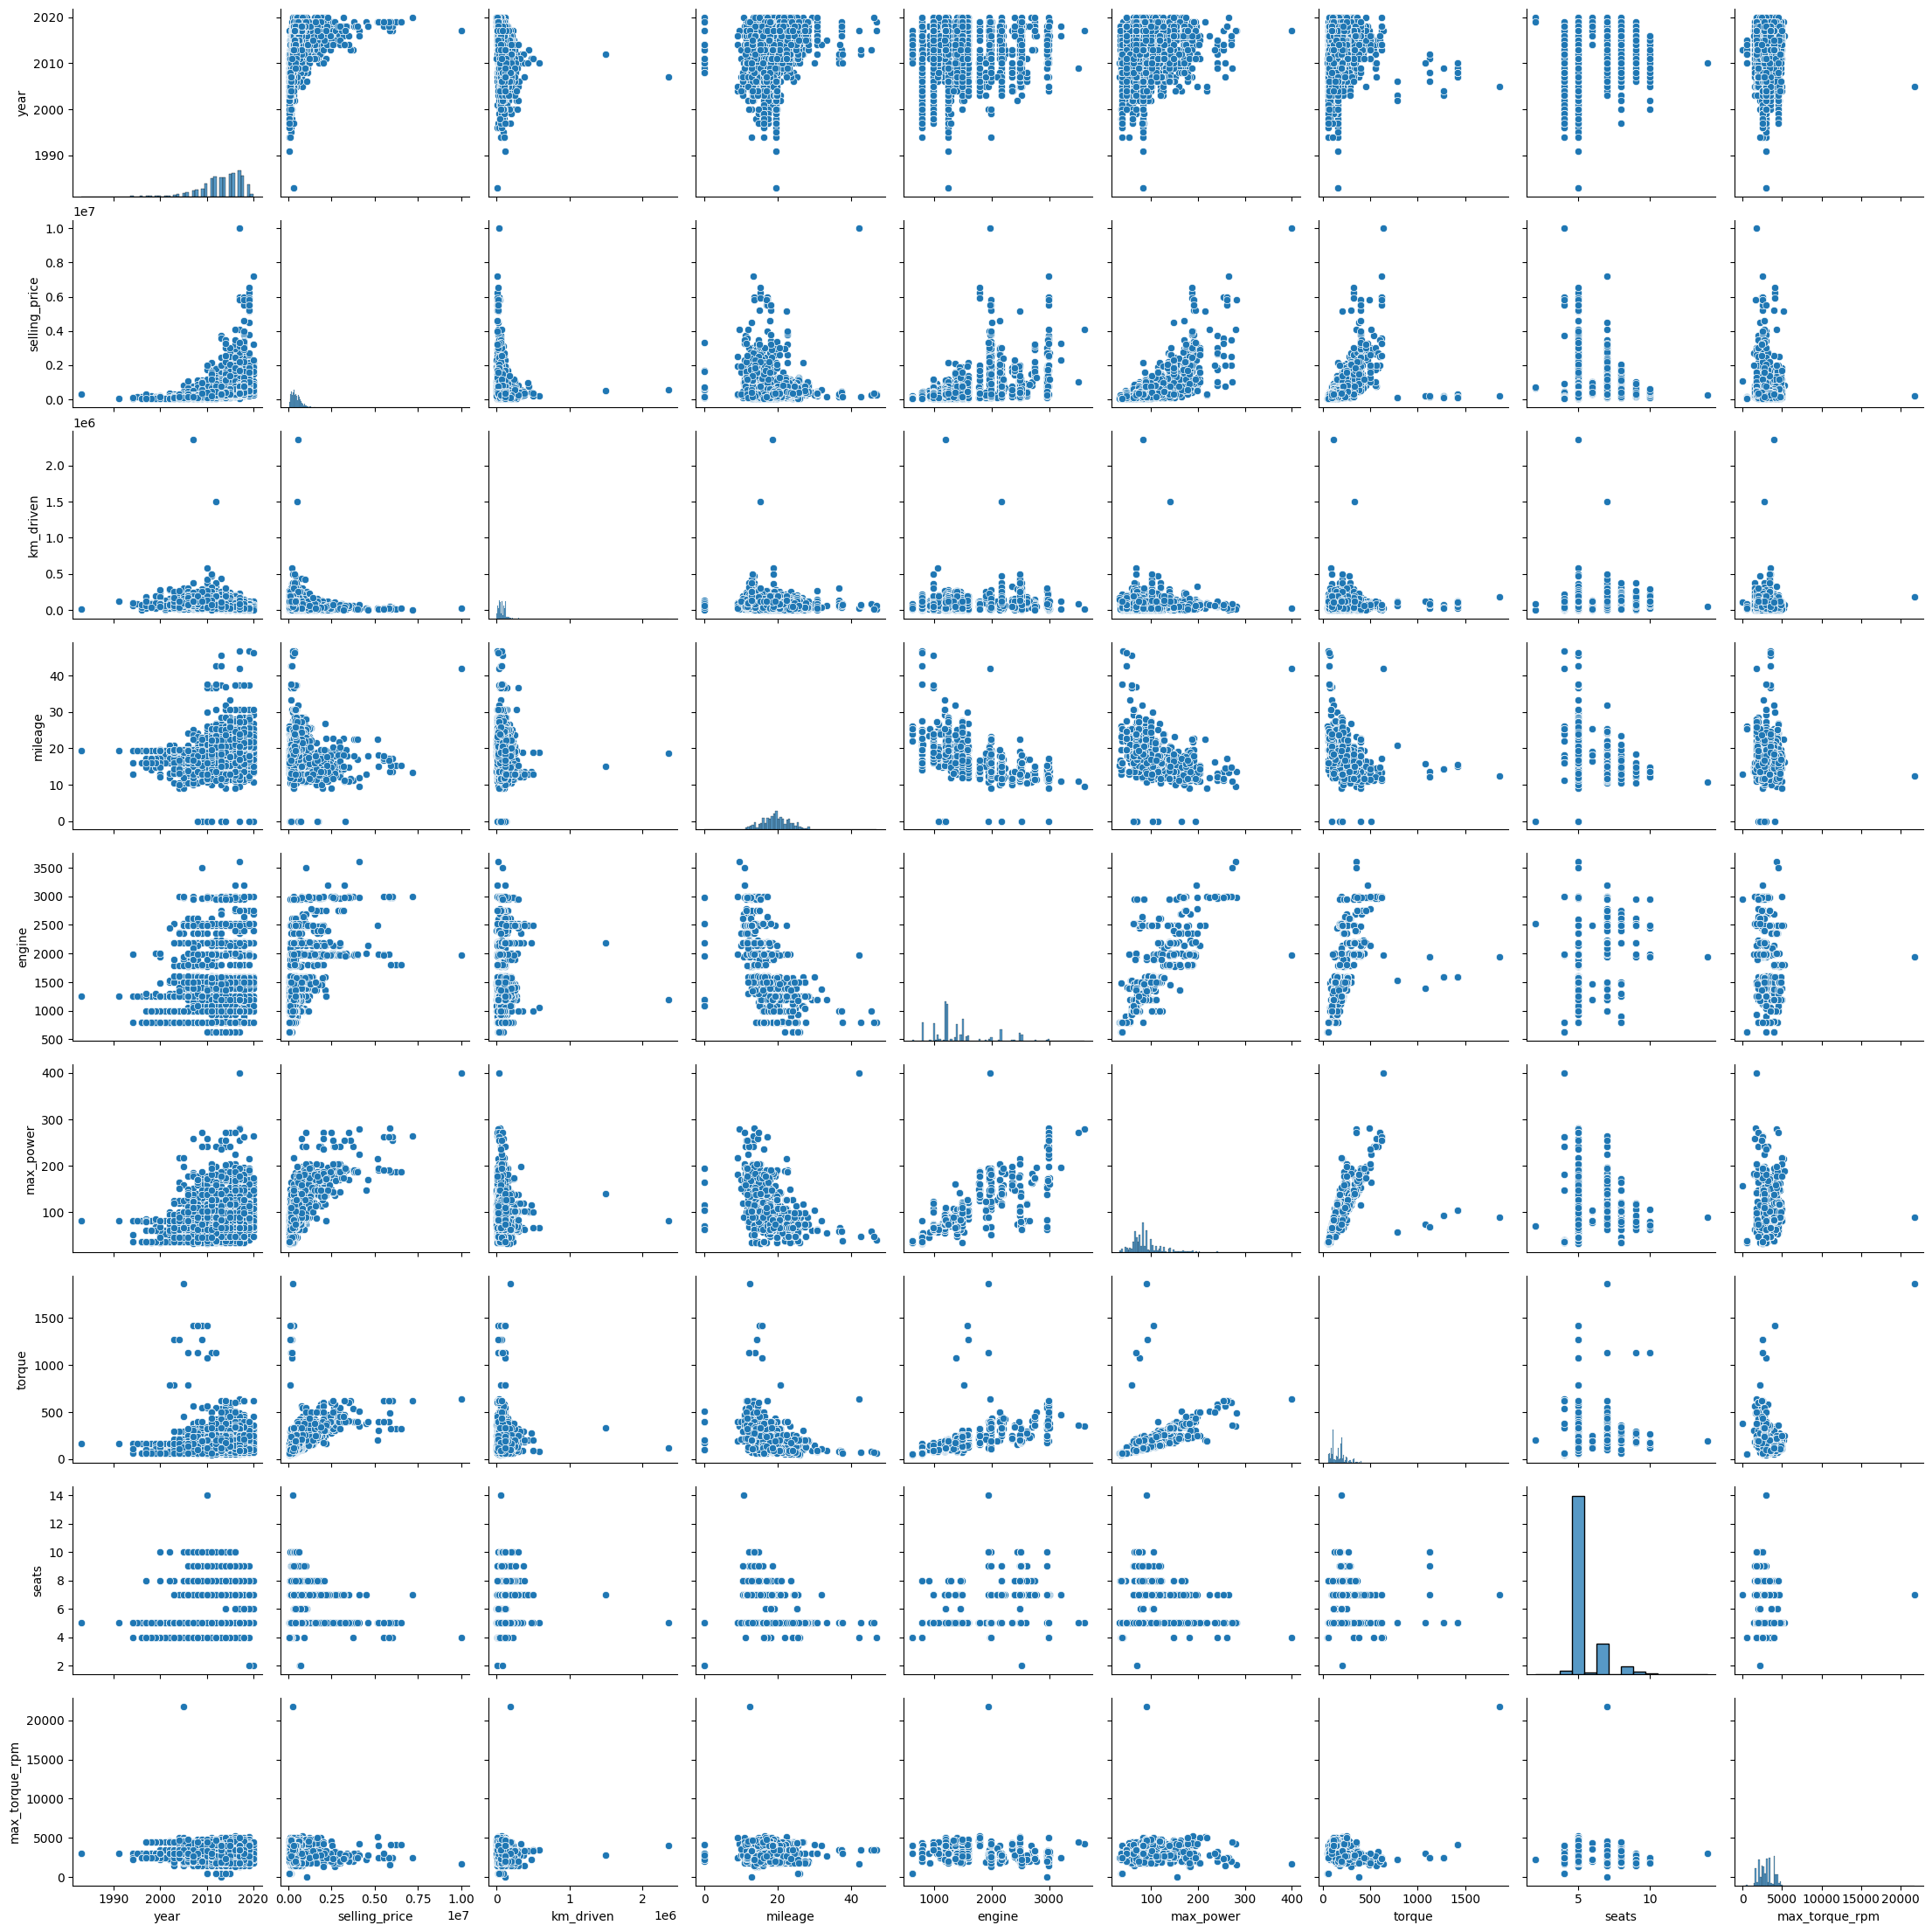

In [84]:
# your code here
sns.pairplot(df_train.select_dtypes(include='number'));


> Можно ли предположить на основе распределений связь признаков с целевой переменной?

Да, есть, некоторые признаки связаны

>Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Да, можно.

Есть зависимость между колонками:
* 'year' и 'selling price'
* 'max_power' и 'selling price'
* 'engine' и 'selling price'
* 'torque' и 'selling price'
* 'selling price' и 'km driven'
* 'max_power' и 'torque'
* 'max_power' и 'engine'
* 'torque' и 'engine'

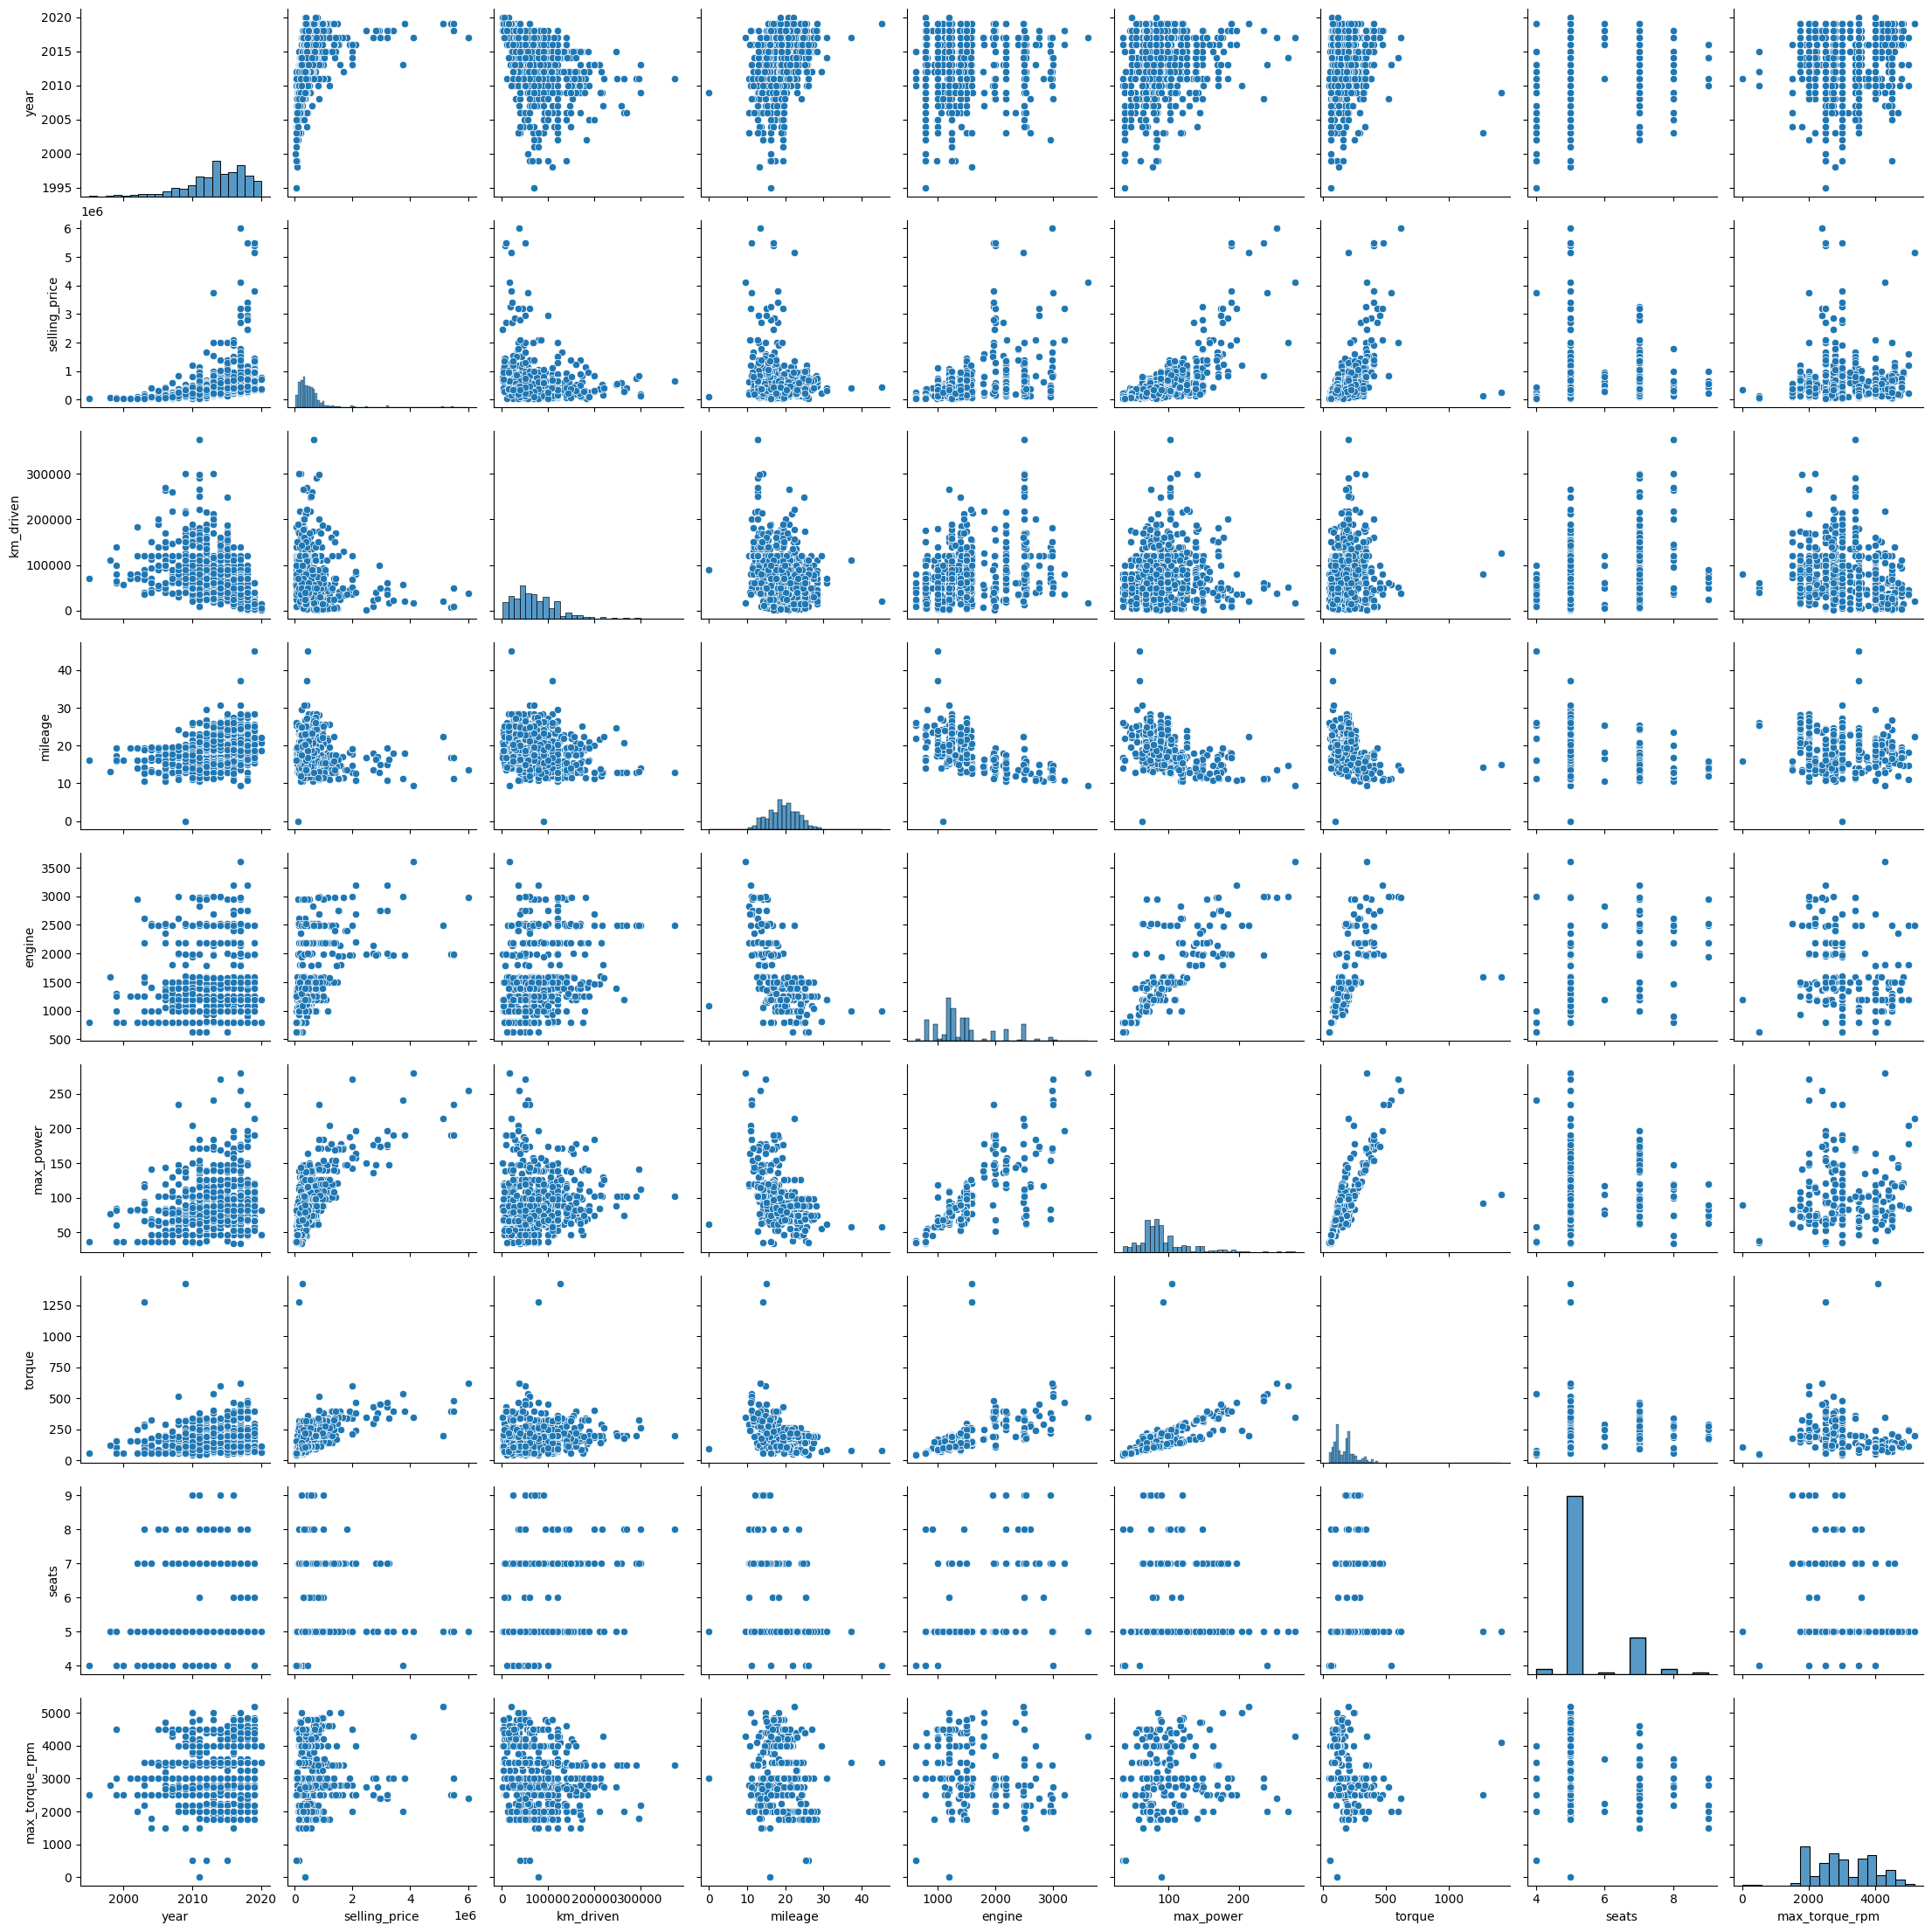

In [85]:
sns.pairplot(df_test.select_dtypes(include='number'));

>Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

В общем похожи, в тестовой больше пар коррелируют

Есть зависимость между колонками:
* 'year' и 'selling price'
* 'year' и 'km_driven' обратная зависимость
* 'torque' и 'selling price'
* 'max_power' и 'selling price'
* 'engine  и 'selling price'
* 'torque' и 'engine'
* 'max_power' и 'engine'
* 'engine' и 'milleage'
* 'max_power' и 'torque'

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [86]:
import matplotlib.pyplot as plt

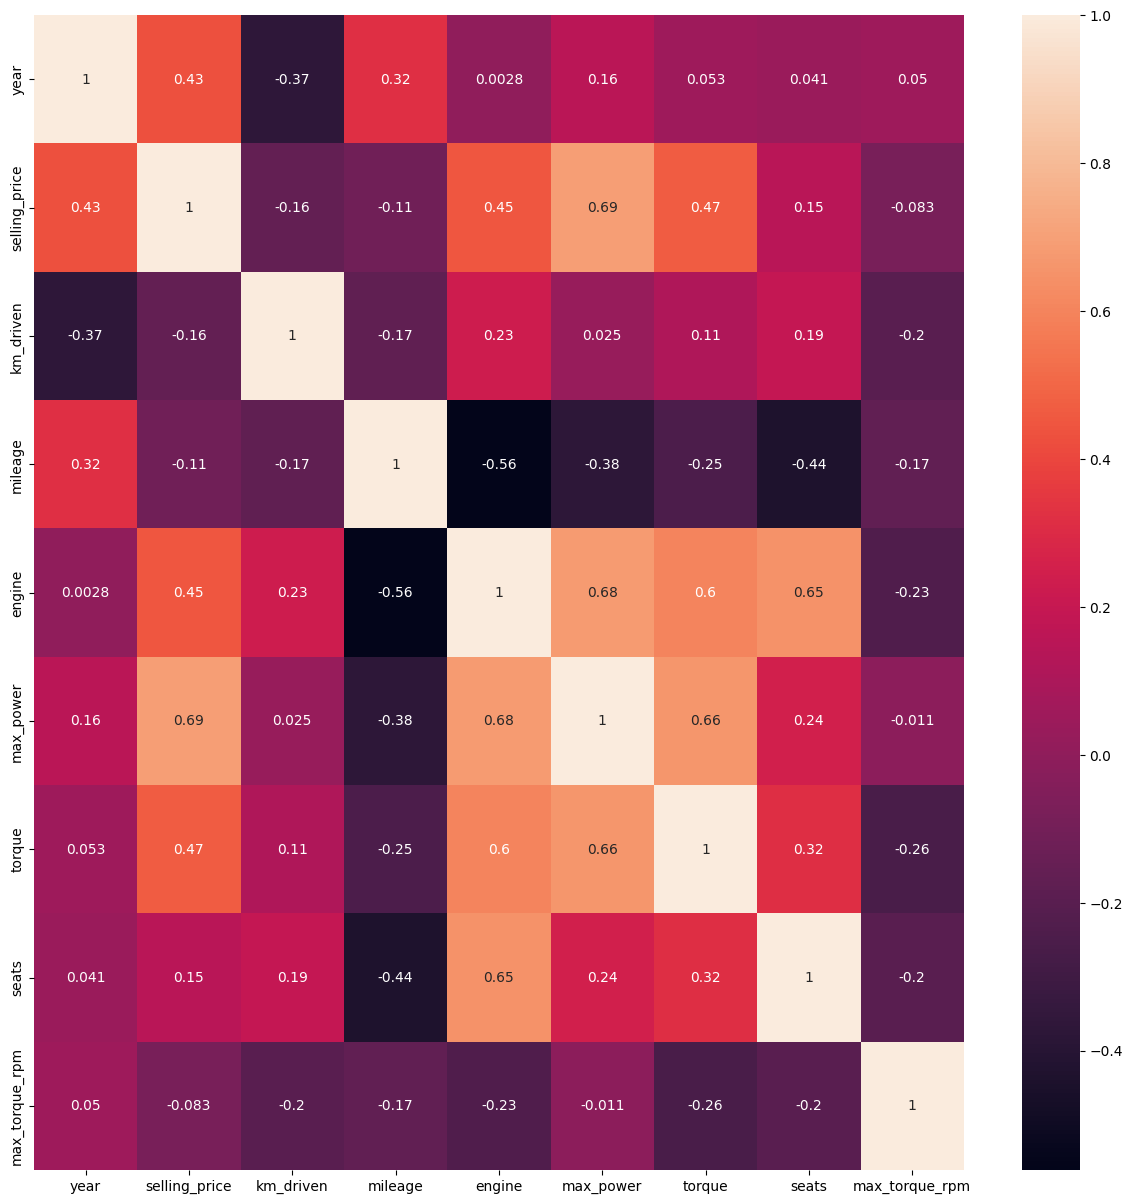

In [87]:
fig, ax = plt.subplots(figsize=(15,15))
corr = df_train.select_dtypes(include='number').corr()
ax = sns.heatmap(corr,  annot=True);

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`* Меньше всего скоррелированы year и engine, year и seats`  
`* сильная положительная зависимость selling_price и max_power, engine и max_power, torque и max_power, seats и engine `  
`* Да, так как есть отрицательная зависмость, да предполагать можно`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

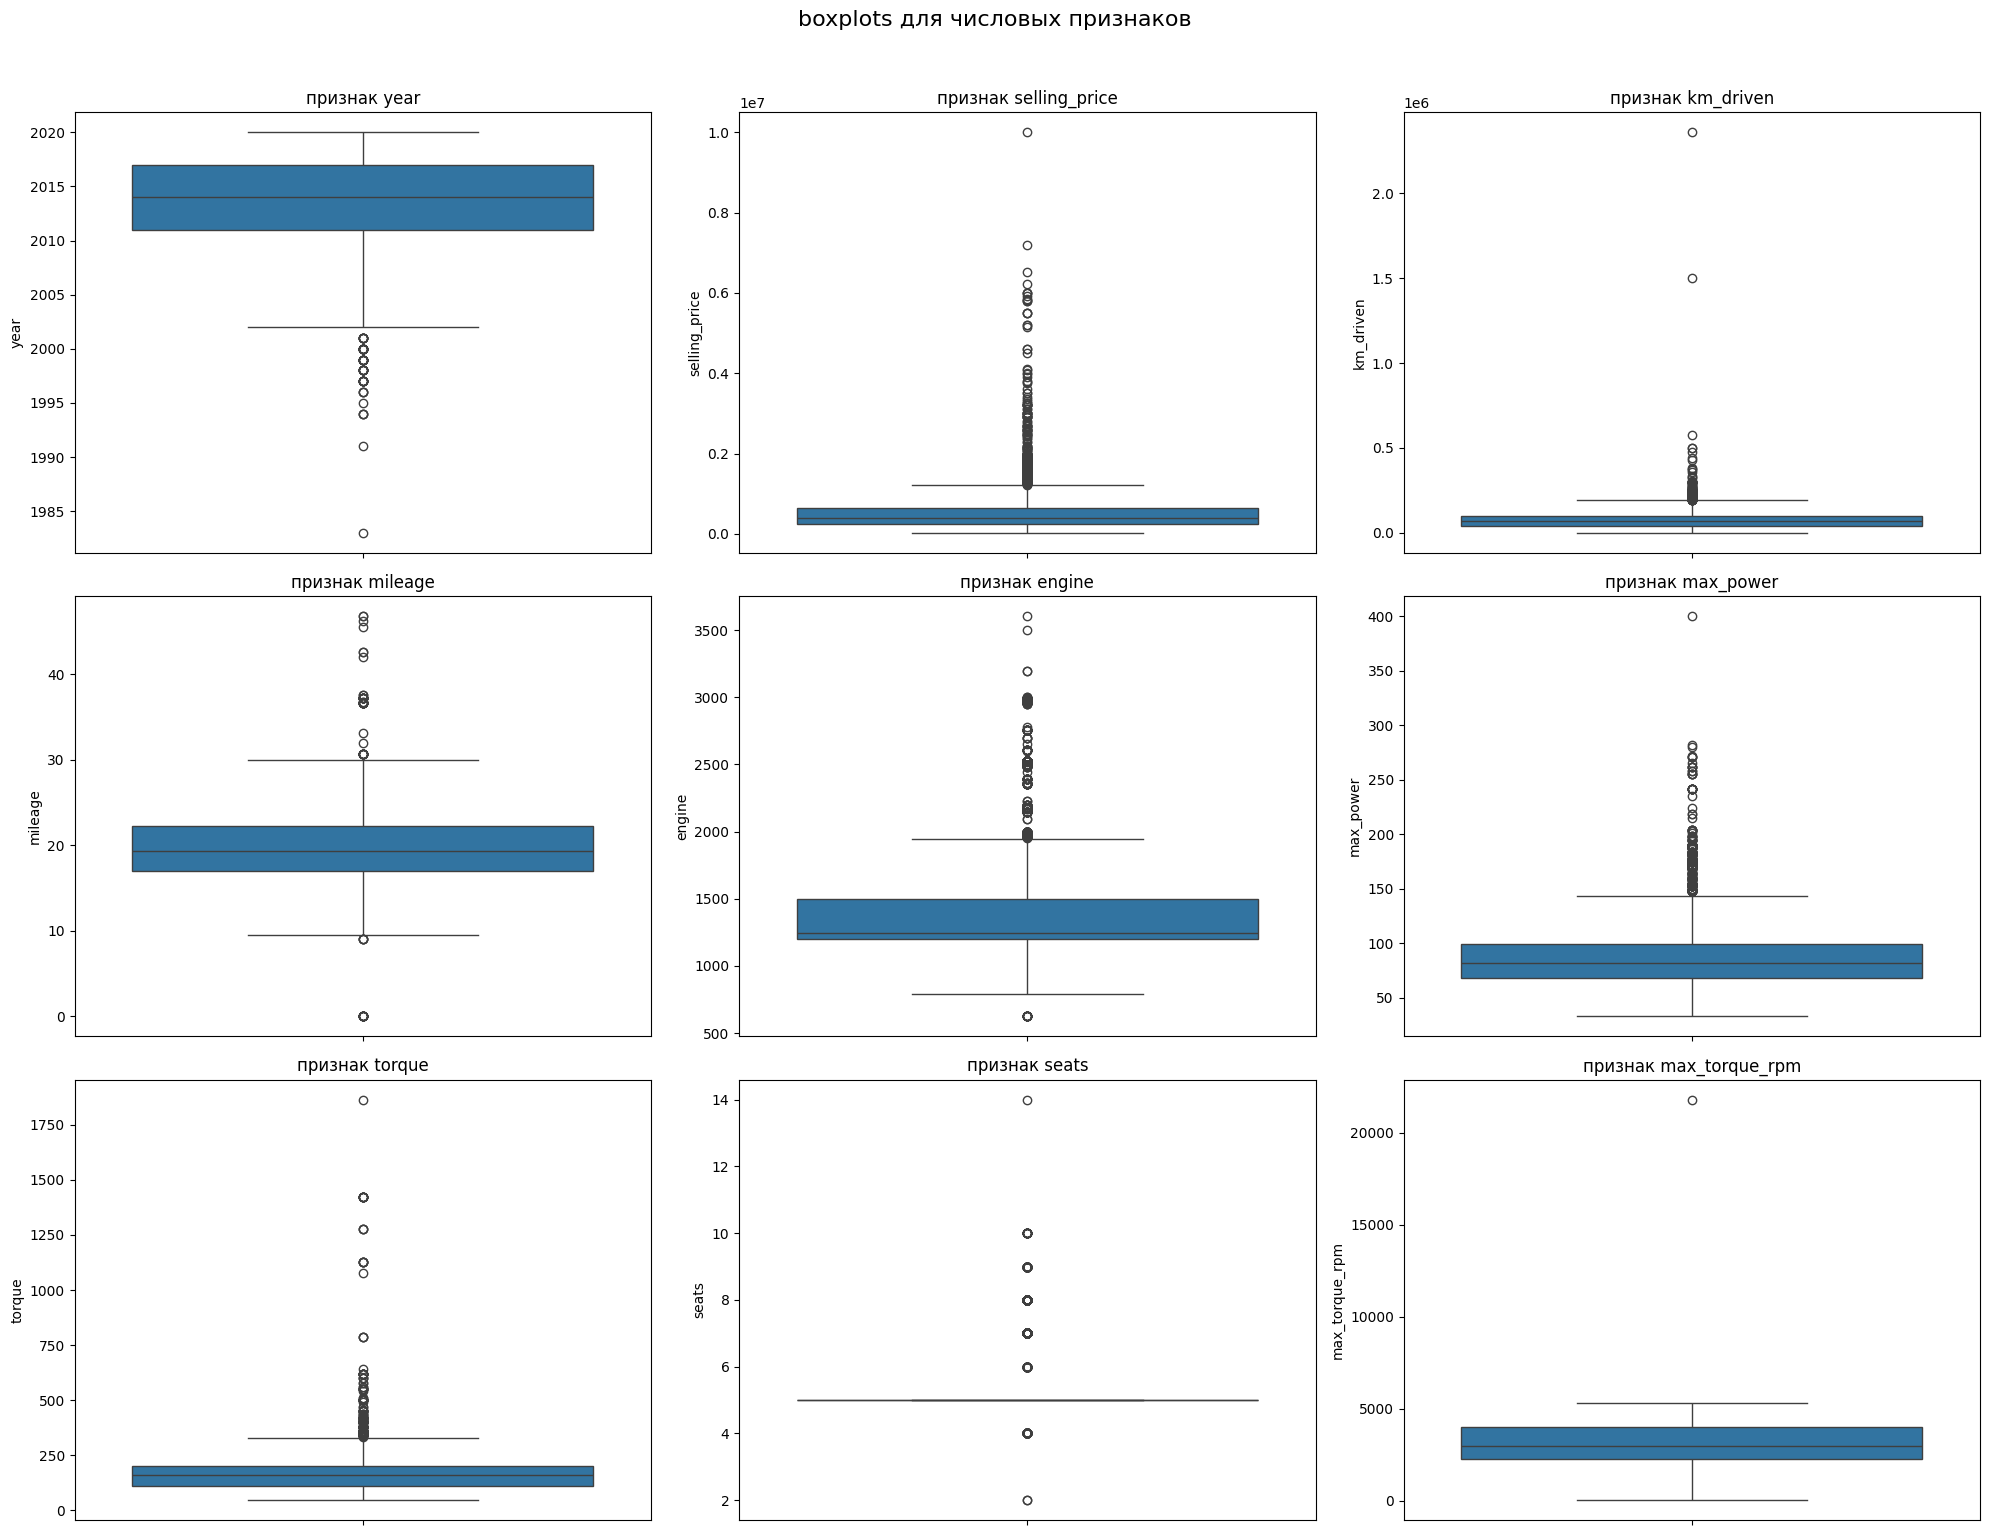

In [88]:
# Полезно посмотреть ящики с усами, чтобы найти выбросы или ошибки в данных

numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3 # кол-во столбцов на полотне
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols # кол - во строк

# Создаем подграфики
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()  # преобразуем массив осей в одномерный

# Создаем box plot для каждого числового признака
for idx, column in enumerate(numeric_columns):
    sns.boxplot(data=df_train[column], ax=axes[idx])
    axes[idx].set_title(f'признак {column}')
    axes[idx].tick_params(axis='x', rotation=45)

# Если количество графиков меньше количества подграфиков, удаляем лишние
for idx in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[idx])

# Настраиваем общий заголовок и расстояние между графиками
plt.suptitle('boxplots для числовых признаков', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Есть значения, с которыми можно поработать в зависимости от результатов модели, например, в max_toque_rpm может быть ошибочное значение.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [286]:
df_train.select_dtypes(include=['int64', 'float64']).columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm'],
      dtype='object')

In [287]:
df_to_model_train = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm']]
df_to_model_test = df_test[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm']]
df_to_model_train.head(5)

year  selling_price  km_driven  mileage  engine  max_power  torque  seats  \
0  2014         450000     145500    23.40    1248      74.00  190.00      5   
1  2014         370000     120000    21.14    1498     103.52  250.00      5   
2  2010         225000     127000    23.00    1396      90.00  219.67      5   
3  2007         130000     120000    16.10    1298      88.20  112.78      5   
4  2017         440000      45000    20.14    1197      81.86  113.75      5   

   max_torque_rpm  
0          2000.0  
1          2500.0  
2          2750.0  
3          4500.0  
4          4000.0

In [288]:
y_train = df_to_model_train['selling_price']
X_train = df_to_model_train.drop(['selling_price'], axis=1)
X_train.shape, y_train.shape

((5840, 8), (5840,))

In [92]:
# assert X_train.shape == (5840, 6)
# не совпадает, так как столбец torque был не удален, а предобработан

In [289]:
y_test = df_to_model_test['selling_price']
X_test = df_to_model_test.drop(['selling_price'], axis=1)
X_test.shape, y_test.shape

((1000, 8), (1000,))

In [ ]:
# assert X_test.shape == (1000, 6)
# не совпадает, так как столбец torque был не удален, а предобработан

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [294]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred_train_lr = lr.predict(X_train)
print('train_MSE:', MSE(y_train, pred_train_lr), 'train_R2:', r2_score(y_train, pred_train_lr))

# предсказание на тестовых данных
pred_test_lr = lr.predict(X_test)
print('test_MSE:', MSE(y_test, pred_test_lr), 'test_R2:', r2_score(y_test, pred_test_lr))

train_MSE: 114063201686.37071 train_R2: 0.6020657866640455
test_MSE: 229416429063.2908 test_R2: 0.6008959074615126


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [295]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [296]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred_train_lr_sc = lr.predict(X_train)
print('train_MSE:', MSE(y_train, pred_train_lr_sc), 'train_R2:', r2_score(y_train, pred_train_lr_sc))

# предсказание на тестовых данных
pred_test_lr_sc = lr.predict(X_test)
print('test_MSE:', MSE(y_test, pred_test_lr_sc), 'test_R2:', r2_score(y_test, pred_test_lr_sc))

train_MSE: 114063201686.37048 train_R2: 0.6020657866640464
test_MSE: 229416429063.29007 test_R2: 0.6008959074615139


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [297]:
lr.coef_

array([162621.7785135 , -48961.60522112,  -1697.61461241,  23867.16394396,
       332162.57980533,   6181.27910419, -27514.68503285, -57037.38834327])

In [298]:
# your code here
max(abs(lr.coef_))

332162.5798053338

Наиболее информативный признак 'engine'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [299]:
from sklearn.linear_model import Lasso

In [300]:
lasso = Lasso()

lasso.fit(X_train, y_train)

pred_train_lasso = lasso.predict(X_train)
print('train_MSE:', MSE(y_train, pred_train_lasso), 'train_R2:', r2_score(y_train, pred_train_lasso))

# предсказание на тестовых данных
pred_test_lasso = lasso.predict(X_test)
print('test_MSE:', MSE(y_test, pred_test_lasso), 'test_R2:', r2_score(y_test, pred_test_lasso))

train_MSE: 114063201699.38742 train_R2: 0.6020657866186341
test_MSE: 229417151482.09494 test_R2: 0.6008946507062642


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [301]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.5, 1, 10, 50, 100, 150, 200, 400, 500, 1000]}

model = Lasso(max_iter = 1500)


gs = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error', verbose = 3)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ............alpha=0.5;, score=-305058775437.775 total time=   0.0s
[CV 2/10] END .............alpha=0.5;, score=-73208246500.588 total time=   0.0s
[CV 3/10] END .............alpha=0.5;, score=-89450468980.089 total time=   0.0s
[CV 4/10] END .............alpha=0.5;, score=-95173791723.534 total time=   0.0s
[CV 5/10] END .............alpha=0.5;, score=-75691491688.526 total time=   0.0s
[CV 6/10] END ............alpha=0.5;, score=-109814047510.487 total time=   0.0s
[CV 7/10] END ............alpha=0.5;, score=-189293110925.269 total time=   0.0s
[CV 8/10] END .............alpha=0.5;, score=-76419060365.139 total time=   0.0s
[CV 9/10] END .............alpha=0.5;, score=-56542317738.790 total time=   0.0s
[CV 10/10] END ...........alpha=0.5;, score=-119805935323.796 total time=   0.0s
[CV 1/10] END ..............alpha=1;, score=-305059029603.438 total time=   0.0s
[CV 2/10] END ...............alpha=1;, score=-

GridSearchCV(cv=10, estimator=Lasso(max_iter=1500),
             param_grid={'alpha': [0.5, 1, 10, 50, 100, 150, 200, 400, 500,
                                   1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [302]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(118925498135.75937, Lasso(alpha=1000, max_iter=1500), {'alpha': 1000})

In [309]:
pred_cv_lasso = gs.best_estimator_.predict(X_train)
r2_score(y_train, pred_cv_lasso)

0.6020297116785172

In [304]:
gs.best_estimator_.coef_

array([161058.41596935, -47976.2661871 ,     -0.        ,  21093.41741878,
       333387.10179154,   5690.13134458, -23938.41445844, -55542.78980222])

In [310]:
pred_cv_test_lasso = gs.best_estimator_.predict(X_test)
r2_score(y_test, pred_cv_test_lasso)

0.5996379161788171

>Сколько грид-сёрчу пришлось обучать моделей?  

В данном случае 100 моделей - 10 фолдов * на 10 параметров

>Что значит каждый параметр param_grid, который вы заполняли для GridSearch?
  
 изменяла только alpha - коэффициент регуляризации

> Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?  

Лучший  - 'alpha': 1000, занулился вес третьего признака  'mileage'

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [311]:
from sklearn.linear_model import ElasticNet

params = {'alpha' : [0.5, 1, 10, 50, 100, 150, 200, 400, 500, 1000], 'tol' : [0.0001, 0.001, 0.01, 1]}

model = ElasticNet(max_iter = 1500)

gs = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error', verbose = 3)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END alpha=0.5, tol=0.0001;, score=-354142710410.698 total time=   0.0s
[CV 2/10] END .alpha=0.5, tol=0.0001;, score=-70375001341.059 total time=   0.0s
[CV 3/10] END .alpha=0.5, tol=0.0001;, score=-91155273731.487 total time=   0.0s
[CV 4/10] END .alpha=0.5, tol=0.0001;, score=-97646037088.015 total time=   0.0s
[CV 5/10] END .alpha=0.5, tol=0.0001;, score=-62864171542.493 total time=   0.0s
[CV 6/10] END alpha=0.5, tol=0.0001;, score=-122020501004.308 total time=   0.0s
[CV 7/10] END alpha=0.5, tol=0.0001;, score=-196336625584.164 total time=   0.0s
[CV 8/10] END .alpha=0.5, tol=0.0001;, score=-73907302731.262 total time=   0.0s
[CV 9/10] END .alpha=0.5, tol=0.0001;, score=-50058203193.517 total time=   0.0s
[CV 10/10] END alpha=0.5, tol=0.0001;, score=-122346229321.487 total time=   0.0s
[CV 1/10] END .alpha=0.5, tol=0.001;, score=-354142710410.698 total time=   0.0s
[CV 2/10] END ..alpha=0.5, tol=0.001;, score=

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1500),
             param_grid={'alpha': [0.5, 1, 10, 50, 100, 150, 200, 400, 500,
                                   1000],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='neg_mean_squared_error', verbose=3)

In [312]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(124085201804.06294,
 ElasticNet(alpha=0.5, max_iter=1500, tol=0.01),
 {'alpha': 0.5, 'tol': 0.01})

In [313]:
pred_cv_elastic = gs.best_estimator_.predict(X_train)
r2_score(y_train, pred_cv_elastic)

0.5815871186161323

In [314]:
gs.best_estimator_.coef_

array([138643.71943208, -50377.71132834,   3257.46010177,  63055.5990815 ,
       225507.31101038,  50118.07137374, -25510.43764779, -28374.47920705])

In [316]:
pred_cv_test_elastic = gs.best_estimator_.predict(X_test)
r2_score(y_test, pred_cv_test_elastic)

0.5478650619235933

Результат хуже

 - Сколько грид-сёрчу пришлось обучать моделей?  
`400 моделей`

 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?  
` ElasticNet(alpha=0.5, max_iter=1500, tol=0.01)`

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [317]:
# name - можно заменить полную марку автомобиля на название вендора без конкретизирования модели,
# для этого выберем только первое слово из названия и приведем к нижнему регистру

df_train['name'] = df_train['name'].apply(lambda x: re.search(r'^[^ ]*', x.lower())[0])
df_test['name'] = df_test['name'].apply(lambda x: re.search(r'^[^ ]*', x.lower())[0])

In [318]:
df_train

name  year  selling_price  km_driven    fuel seller_type  \
0      maruti  2014         450000     145500  Diesel  Individual   
1       skoda  2014         370000     120000  Diesel  Individual   
2     hyundai  2010         225000     127000  Diesel  Individual   
3      maruti  2007         130000     120000  Petrol  Individual   
4     hyundai  2017         440000      45000  Petrol  Individual   
...       ...   ...            ...        ...     ...         ...   
5835  hyundai  2008         120000     191000  Petrol  Individual   
5836   maruti  2013         260000      50000  Petrol  Individual   
5837  hyundai  2013         320000     110000  Petrol  Individual   
5838  hyundai  2007         135000     119000  Diesel  Individual   
5839   maruti  2009         382000     120000  Diesel  Individual   

     transmission                 owner  mileage  engine  max_power  torque  \
0          Manual           First Owner    23.40    1248      74.00  190.00   
1          Manual          Second Owner    21.14    1498     103.52  250.00   
2          Manual           First Owner    23.00    1396      90.00  219.67   
3          Manual           First Owner    16.10    1298      88.20  112.78   
4          Manual           First Owner    20.14    1197      81.86  113.75   
...           ...                   ...      ...     ...        ...     ...   
5835       Manual           First Owner    17.92    1086      62.10   96.10   
5836       Manual          Second Owner    18.90     998      67.10   90.00   
5837       Manual           First Owner    18.50    1197      82.85  113.70   
5838       Manual  Fourth & Above Owner    16.80    1493     110.00  235.36   
5839       Manual           First Owner    19.30    1248      73.90  190.00   

      seats  max_torque_rpm  
0         5          2000.0  
1         5          2500.0  
2         5          2750.0  
3         5          4500.0  
4         5          4000.0  
...     ...             ...  
5835      5          3000.0  
5836      5          3500.0  
5837      5          4000.0  
5838      5          2750.0  
5839      5          2000.0  

[5840 rows x 14 columns]

In [319]:
df_train.name.unique()

array(['maruti', 'skoda', 'hyundai', 'toyota', 'ford', 'renault',
       'mahindra', 'honda', 'chevrolet', 'fiat', 'datsun', 'tata', 'jeep',
       'mercedes-benz', 'mitsubishi', 'audi', 'volkswagen', 'bmw',
       'nissan', 'lexus', 'jaguar', 'land', 'mg', 'volvo', 'daewoo',
       'kia', 'force', 'ambassador', 'isuzu', 'peugeot'], dtype=object)

In [320]:
df_test.name.unique()

array(['mahindra', 'tata', 'honda', 'chevrolet', 'maruti', 'hyundai',
       'lexus', 'ford', 'jeep', 'renault', 'toyota', 'skoda', 'bmw',
       'datsun', 'volvo', 'nissan', 'volkswagen', 'ambassador', 'jaguar',
       'mercedes-benz', 'mitsubishi', 'audi', 'opel', 'fiat', 'ashok'],
      dtype=object)

In [321]:
len(df_train.name.unique()), len(df_test.name.unique()) # получилось 30 категорий в трейне и 25 в тесте

(30, 25)

In [322]:
# в тесте нет некоторых категорий
for el in df_test.name.unique():
    if el not in df_train.name.unique():
        print(el)

opel
ashok


In [323]:
# в трйне также нет некоторых категорий
for el in df_train.name.unique():
    if el not in df_test.name.unique():
        print(el)

land
mg
daewoo
kia
force
isuzu
peugeot


In [ ]:
# assert X_train_cat.shape == (5840, 10)

In [324]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()

In [325]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

In [326]:
X_test_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     1000    1000        1000         1000         1000
unique      25       4           3            2            5
top     maruti  Diesel  Individual       Manual  First Owner
freq       290     534         837          877          623

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [327]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [328]:
cat_cols = X_train_cat.select_dtypes(include='object').columns

In [344]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# объявляем OneHotEncoder, drop='first' - удаляем одну закодированную колонку (первую), sparse_output = False - отказываемся от сжатия sparce формата
# handle_unknown='ignore' - новые категории будут игнорироваться, и для них будут возвращаться нулевые значения во всех столбцах, так решаем проблему отсутствия категорий в тесте
one_hot_enc = OneHotEncoder(drop='first', sparse_output = False, handle_unknown='ignore')
# передаем в модель кодировщика список колонок для кодирования
encoded_df_train = pd.DataFrame(one_hot_enc.fit_transform(X_train_cat[cat_cols]))
encoded_df_test = pd.DataFrame(one_hot_enc.transform(X_test_cat[cat_cols]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [346]:
encoded_df_train

0    1    2    3    4    5    6    7    8    9   ...   29   30   31  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5835  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
5836  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
5837  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
5838  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
5839  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   

       32   33   34   35   36   37   38  
0     1.0  0.0  1.0  0.0  0.0  0.0  0.0  
1     1.0  0.0  1.0  0.0  1.0  0.0  0.0  
2     1.0  0.0  1.0  0.0  0.0  0.0  0.0  
3     1.0  0.0  1.0  0.0  0.0  0.0  0.0  
4     1.0  0.0  1.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
5835  1.0  0.0  1.0  0.0  0.0  0.0  0.0  
5836  1.0  0.0  1.0  0.0  1.0  0.0  0.0  
5837  1.0  0.0  1.0  0.0  0.0  0.0  0.0  
5838  1.0  0.0  1.0  1.0  0.0  0.0  0.0  
5839  1.0  0.0  1.0  0.0  0.0  0.0  0.0  

[5840 rows x 39 columns]

In [347]:
one_hot_enc.get_feature_names_out() # просмотр полученных признаков

array(['name_audi', 'name_bmw', 'name_chevrolet', 'name_daewoo',
       'name_datsun', 'name_fiat', 'name_force', 'name_ford',
       'name_honda', 'name_hyundai', 'name_isuzu', 'name_jaguar',
       'name_jeep', 'name_kia', 'name_land', 'name_lexus',
       'name_mahindra', 'name_maruti', 'name_mercedes-benz', 'name_mg',
       'name_mitsubishi', 'name_nissan', 'name_peugeot', 'name_renault',
       'name_skoda', 'name_tata', 'name_toyota', 'name_volkswagen',
       'name_volvo', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype=object)

In [348]:
# формирование датасета с закодированными данными
encoded_df_train.columns = one_hot_enc.get_feature_names_out()
encoded_df_test.columns = one_hot_enc.get_feature_names_out()

In [349]:
# соединяем закодированный датасет с остальными данными и удаляем незакодированные категорияальные колонки
X_train_onehot =  X_train_cat.join(encoded_df_train)
X_train_onehot.drop(columns=cat_cols, axis = 1, inplace = True)
X_train_onehot.drop('selling_price', axis = 1, inplace = True)
X_test_onehot =  X_test_cat.join(encoded_df_test)
X_test_onehot.drop(columns=cat_cols, axis = 1, inplace = True)
X_test_onehot.drop('selling_price', axis = 1, inplace = True)

X_train_onehot.shape, X_test_onehot.shape

((5840, 47), (1000, 47))

In [350]:
X_test_onehot

year  km_driven  mileage  engine  max_power  torque  seats  \
0    2010     168000    14.00    2498     112.00  260.00      7   
1    2017      25000    21.50    1497     108.50  260.00      5   
2    2007     218463    12.90    1799     130.00  172.00      5   
3    2015     173000    25.10    1498      98.60  200.00      5   
4    2011      70000    16.50    1172      65.00   96.00      5   
..    ...        ...      ...     ...        ...     ...    ...   
995  2008     100000    19.81    1086      68.05   99.04      5   
996  2017      50000    18.60    1197      81.83  114.70      5   
997  2009      40000    23.00    1396      90.00  219.67      5   
998  2012      25000    20.36    1197      78.90  111.80      5   
999  2016     110000    26.00    1498      98.60  200.00      5   

     max_torque_rpm  name_audi  name_bmw  ...  fuel_Diesel  fuel_LPG  \
0            2200.0        0.0       0.0  ...          1.0       0.0   
1            2750.0        0.0       0.0  ...          1.0       0.0   
2            4300.0        0.0       0.0  ...          0.0       0.0   
3            1750.0        0.0       0.0  ...          1.0       0.0   
4            3000.0        0.0       0.0  ...          0.0       0.0   
..              ...        ...       ...  ...          ...       ...   
995          4500.0        0.0       0.0  ...          0.0       0.0   
996          4000.0        0.0       0.0  ...          0.0       0.0   
997          2750.0        0.0       0.0  ...          1.0       0.0   
998          4000.0        0.0       0.0  ...          0.0       0.0   
999          1750.0        0.0       0.0  ...          1.0       0.0   

     fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0.0                     1.0                           0.0   
1            0.0                     1.0                           0.0   
2            1.0                     1.0                           0.0   
3            0.0                     1.0                           0.0   
4            1.0                     1.0                           0.0   
..           ...                     ...                           ...   
995          1.0                     1.0                           0.0   
996          1.0                     1.0                           0.0   
997          0.0                     1.0                           0.0   
998          1.0                     1.0                           0.0   
999          0.0                     1.0                           0.0   

     transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                    1.0                         0.0                 0.0   
1                    1.0                         0.0                 0.0   
2                    0.0                         0.0                 0.0   
3                    1.0                         0.0                 0.0   
4                    1.0                         0.0                 1.0   
..                   ...                         ...                 ...   
995                  1.0                         0.0                 1.0   
996                  1.0                         0.0                 1.0   
997                  1.0                         0.0                 0.0   
998                  1.0                         0.0                 0.0   
999                  1.0                         0.0                 0.0   

     owner_Test Drive Car  owner_Third Owner  
0                     0.0                0.0  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0  
..                    ...                ...  
995                   0.0                0.0  
996                   0.0                0.0  
997                   0.0                0.0  
998                   0.0                0.0  
999             

In [483]:
with open('ohe.pkl', 'wb') as f:
    pickle.dump(one_hot_enc, f)

In [351]:
X_train_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5840 non-null   int64  
 1   km_driven                     5840 non-null   int64  
 2   mileage                       5840 non-null   float64
 3   engine                        5840 non-null   int64  
 4   max_power                     5840 non-null   float64
 5   torque                        5840 non-null   float64
 6   seats                         5840 non-null   int64  
 7   max_torque_rpm                5840 non-null   float64
 8   name_audi                     5840 non-null   float64
 9   name_bmw                      5840 non-null   float64
 10  name_chevrolet                5840 non-null   float64
 11  name_daewoo                   5840 non-null   float64
 12  name_datsun                   5840 non-null   float64
 13  nam

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [353]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [355]:
ridge = Ridge()

ridge.fit(X_train_onehot , y_train)

pred_train_ridge = ridge.predict(X_train_onehot)
print('train_MSE:', MSE(y_train, pred_train_ridge), 'train_R2:', r2_score(y_train, pred_train_ridge))

# предсказание на тестовых данных
pred_test_ridge = ridge.predict(X_test_onehot)
print('test_MSE:', MSE(y_test, pred_test_ridge), 'test_R2:', r2_score(y_test, pred_test_ridge))

train_MSE: 67991147582.55124 train_R2: 0.7627981379878783
test_MSE: 125692603861.1203 test_R2: 0.781338970327392


In [356]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 50]
        #   'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg']
          }

model = Ridge()

gs = GridSearchCV(model, params, cv=10, scoring='r2', verbose = 3)
gs.fit(X_train_onehot, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END .......................alpha=0.01;, score=0.709 total time=   0.0s
[CV 2/10] END .......................alpha=0.01;, score=0.783 total time=   0.0s
[CV 3/10] END .......................alpha=0.01;, score=0.742 total time=   0.0s
[CV 4/10] END .......................alpha=0.01;, score=0.644 total time=   0.0s
[CV 5/10] END .......................alpha=0.01;, score=0.533 total time=   0.0s
[CV 6/10] END .......................alpha=0.01;, score=0.800 total time=   0.0s
[CV 7/10] END .......................alpha=0.01;, score=0.677 total time=   0.0s
[CV 8/10] END .......................alpha=0.01;, score=0.622 total time=   0.0s
[CV 9/10] END .......................alpha=0.01;, score=0.709 total time=   0.0s
[CV 10/10] END ......................alpha=0.01;, score=0.741 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.708 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 50]},
             scoring='r2', verbose=3)

In [357]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(-0.6994295439584246, Ridge(alpha=1), {'alpha': 1})

In [358]:
pred_cv = gs.best_estimator_.predict(X_train_onehot)
r2_score(y_train, pred_cv)

0.7627981379878783

In [359]:
gs.best_estimator_.coef_

array([ 3.89270111e+04, -5.35465985e-01,  4.48794732e+02,  5.65059408e+01,
        6.48052752e+03,  1.15043151e+02,  2.95174701e+03, -5.57902214e+01,
        3.86174196e+05,  1.00280085e+06, -5.05849543e+05, -1.49769919e+04,
       -5.02903873e+05, -5.11812659e+05, -3.52757413e+05, -4.43027964e+05,
       -4.48732189e+05, -4.14124351e+05,  4.77843641e+04,  5.66455008e+05,
        7.19549722e+04, -5.03032184e+04,  8.28887183e+05,  1.53503223e+06,
       -4.25101067e+05, -3.63546307e+05,  5.43048860e+05,  9.79278181e+04,
       -1.26279471e+05, -4.57938000e+05, -4.25066973e+04, -4.52320969e+05,
       -4.65662415e+05, -5.20159286e+05, -1.42818674e+05, -4.92337170e+05,
        1.65061223e+06,  3.94494900e+04,  1.44606140e+05,  5.15395291e+04,
       -6.42580187e+04, -4.33205776e+04, -9.47278124e+04, -5.00719503e+04,
       -6.16166843e+04,  2.50741613e+06, -4.88569903e+04])

In [360]:
pred_cv_test = gs.best_estimator_.predict(X_test_onehot)
r2_score(y_test, pred_cv_test)

0.781338970327392

`С добавлением категориальных признаков качество улучшилось`


In [362]:
# сохранение модели в pikle
with open('ridge.pkl', 'wb') as f:
    pickle.dump(ridge, f)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [154]:
def business_metrics(y_true, y_pred):
    diff = abs(y_true - y_pred) / y_true * 100
    acc_business = (diff < 10).sum() / len(y_true)
    return acc_business

train_business = business_metrics(y_train, pred_train)
test_business = business_metrics(y_test, pred_test)
print(train_business, test_business)

0.2690068493150685 0.282


In [363]:
#  модель с линейной регрессией
train_business = business_metrics(y_train, pred_train_lr)
test_business = business_metrics(y_test, pred_test_lr)
print(train_business, test_business)

0.22003424657534246 0.237


In [364]:
#  линейная регрессия плюс нормализация данных
train_business = business_metrics(y_train, pred_train_lr_sc)
test_business = business_metrics(y_test, pred_test_lr_sc)
print(train_business, test_business)

0.22003424657534246 0.237


In [365]:
# модель лассо
train_business = business_metrics(y_train, pred_train_lasso)
test_business = business_metrics(y_test, pred_test_lasso)
print(train_business, test_business)

0.22003424657534246 0.237


In [370]:
# модель ElasticNet
train_business = business_metrics(y_train, pred_cv_elastic)
test_business = business_metrics(y_test, pred_cv_test_elastic)
print(train_business, test_business)

0.2404109589041096 0.267


In [371]:
# финальная модель Ridge c категориальными признаками
train_business = business_metrics(y_train, pred_train_ridge)
test_business = business_metrics(y_test, pred_test_ridge)
print(train_business, test_business)

0.2690068493150685 0.282


`Бизнес метрика показала, что лучшей является последняя модель с категориальными признаками Ridge`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [457]:
json_test = ''' {

        "name": "Maruti Swift Dzire VDI",
        "year": 2014,
        "selling_price": 450000,
        "km_driven": 145500,
        "fuel": "Diesel",
        "seller_type": "Individual",
        "transmission": "Manual",
        "owner": "First Owner",
        "mileage": "23.4 kmpl",
        "engine": "1248 CC",
        "max_power": "74 bhp",
        "torque": "190Nm@ 2000rpm",
        "seats": 5.0

        }
        '''

In [458]:
from io import StringIO
test_test = pd.DataFrame([pd.read_json(StringIO(json_test),  typ='series')])

test_test

name  year  selling_price  km_driven    fuel seller_type  \
0  Maruti Swift Dzire VDI  2014         450000     145500  Diesel  Individual   

  transmission        owner    mileage   engine max_power          torque  \
0       Manual  First Owner  23.4 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm   

   seats  
0    5.0

In [481]:
# Инференс

test_test = pd.DataFrame([pd.read_json(StringIO(json_test),  typ='series')])



def inference(test_test, model = ridge, one_hot_enc = one_hot_enc):

    cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
    # редактирование 'mileage'
    test_test = test_test.apply(edit_mileage, axis = 1)
    # редактирование 'engine'
    test_test['engine'] = test_test['engine'].apply(lambda x: float(re.sub(r'[^0-9]','', x)) if type(x) == str else x)
    # редактирование 'max_power'
    test_test['max_power'] = test_test['max_power'].apply(lambda x: float(re.sub(r'[^0-9.]','', x).strip()) if type(x) == str else x)
    # редактирование 'torque'
    test_test = test_test.apply(edit_torque, axis=1)
    # редактирование name
    test_test['name'] = test_test['name'].apply(lambda x: re.search(r'^[^ ]*', x.lower())[0])
    test_test['engine'] = test_test['engine'].astype('int64')
    test_test['seats'] = test_test['seats'].astype('int64')

    # кодирование
    encoded_df_test = pd.DataFrame(one_hot_enc.transform(test_test[cat_cols]))
    encoded_df_test.columns = one_hot_enc.get_feature_names_out()
    X_test_onehot =  test_test.join(encoded_df_test)
    X_test_onehot.drop(columns=cat_cols, axis = 1, inplace = True)
    X_test_onehot.drop('selling_price', axis = 1, inplace = True)

    # предсказание
    predict = model.predict(X_test_onehot)

    return predict

In [482]:
predict_final  = inference(test_test)
predict_final

array([480173.97226602])

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



кот Сабрины